<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/frequent_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('trai.csv')

In [5]:
df=pd.read_csv('trai.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [6]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'NUmber of house')

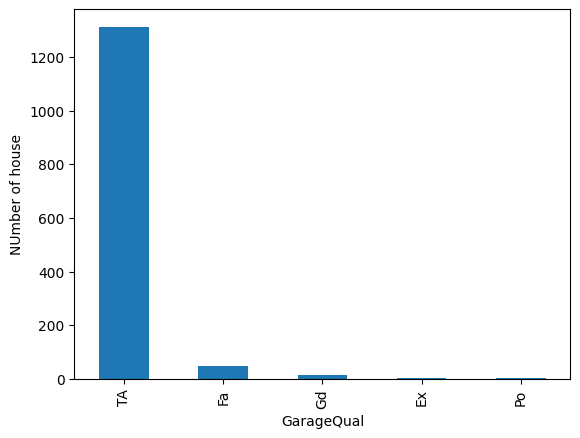

In [8]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('NUmber of house')

In [ ]:
df['GarageQual'].fillna('Mssing',inplace=True)

In [9]:
df['GarageQual'].mode()

,GarageQual
0,TA


<Axes: ylabel='Density'>

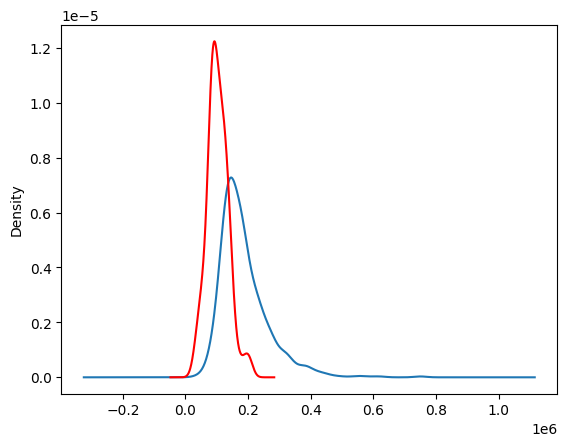

In [10]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

In [11]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [12]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

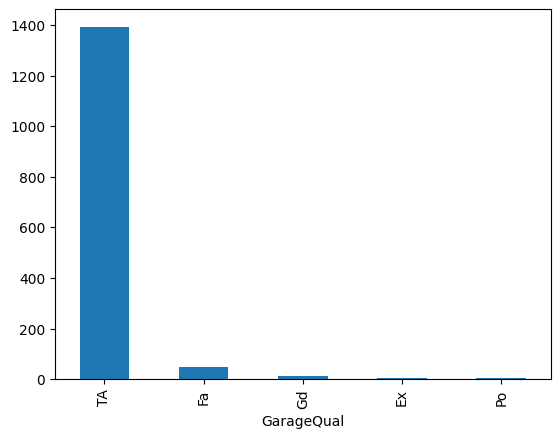

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

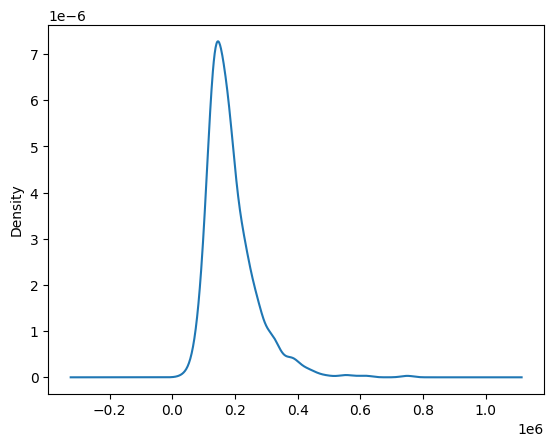

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)

#distribution


<Axes: ylabel='Density'>

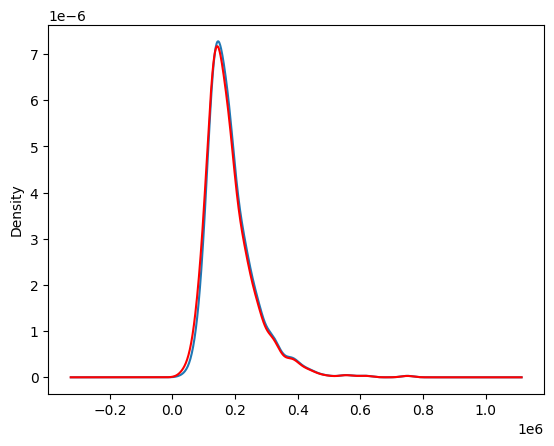

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='red',ax=ax)

<Axes: xlabel='FireplaceQu'>

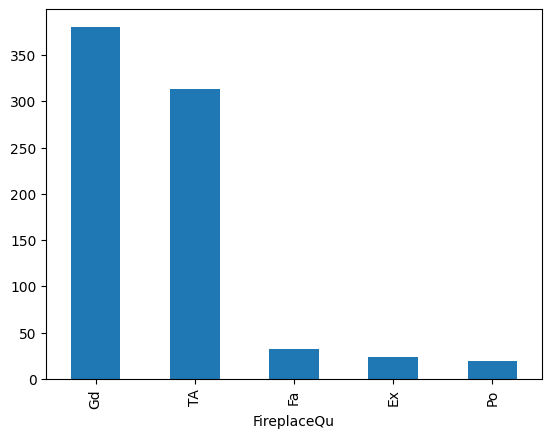

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [18]:
df['FireplaceQu'].mode

<bound method Series.mode of 0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object>

<Axes: ylabel='Density'>

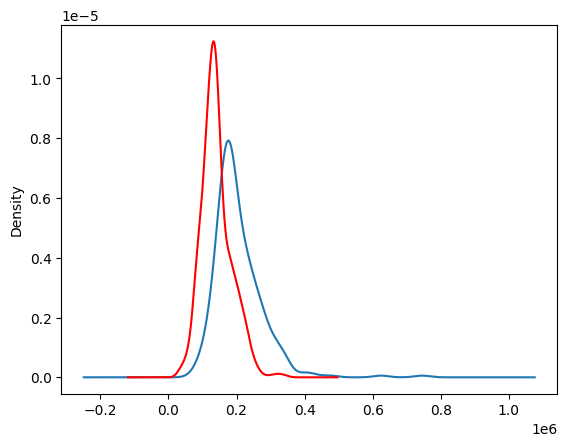

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

In [20]:
temp=df[df['FireplaceQu']=='TA']['SalePrice']

In [22]:
df['FireplaceQu'].fillna('TA',inplace=True)

<Axes: xlabel='FireplaceQu'>

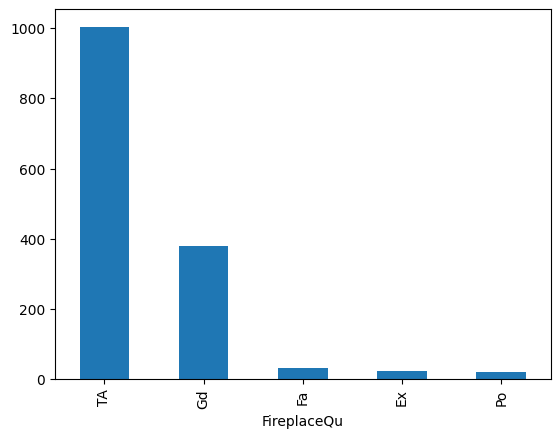

In [23]:
df['FireplaceQu'].value_counts().plot(kind='bar')

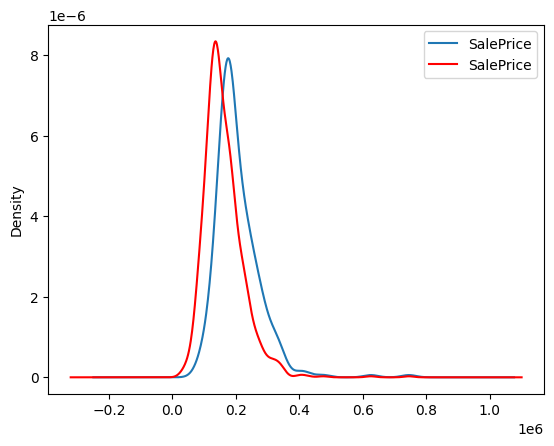

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)

df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',color='red',ax=ax)
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('SalePrice',axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imputer=SimpleImputer(strategy='most_frequent')

In [29]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [31]:
imputer.statistics_

array(['TA', 'TA'], dtype=object)